# `K - Means`

The k-means algorithm is a simple algorithm capable of clustering this kind of dataset very quickly and efficiently, often
in just a few iterations. It was proposed by **Stuart Lloyd at Bell Labs** in 1957 as a technique for pulse-code modulation, but it was only published
outside of the company in 1982. In 1965, Edward W. Forgy had published 1 virtually the same algorithm, so k-means is sometimes referred to as the
**Lloyd–Forgy** algorithm

In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

In [28]:
X , y = make_blobs(n_features=2 , centers=5 , n_samples= 1000 , random_state=40)

In [29]:
x1 = list()
x2 = list()
for i in X:
    x1.append(i[0])
    x2.append(i[1])


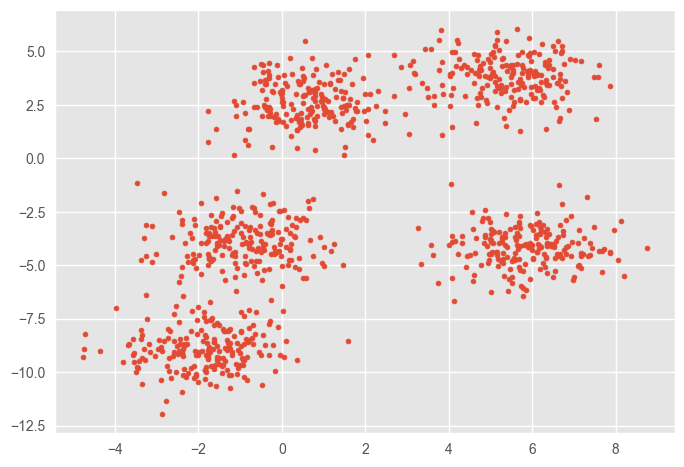

In [30]:
plt.scatter(x1,x2,marker='.')

In [31]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

In [32]:
y_pred

array([1, 1, 2, 1, 0, 3, 0, 4, 0, 2, 4, 3, 1, 3, 1, 3, 4, 1, 2, 1, 0, 3,
       4, 4, 1, 0, 0, 4, 4, 4, 0, 3, 2, 0, 3, 0, 3, 2, 0, 2, 1, 0, 4, 4,
       1, 3, 4, 4, 0, 3, 1, 4, 4, 1, 4, 0, 0, 4, 1, 2, 0, 1, 1, 2, 4, 0,
       1, 2, 1, 4, 1, 0, 0, 0, 3, 3, 4, 3, 1, 2, 2, 4, 3, 4, 2, 3, 1, 1,
       2, 4, 0, 0, 4, 1, 3, 3, 1, 3, 1, 4, 1, 1, 3, 0, 4, 2, 0, 1, 4, 0,
       0, 4, 0, 3, 0, 1, 3, 1, 1, 2, 4, 2, 4, 1, 3, 2, 3, 2, 4, 0, 3, 4,
       4, 0, 2, 2, 2, 3, 4, 0, 0, 1, 0, 1, 3, 3, 2, 2, 3, 2, 3, 3, 1, 0,
       2, 0, 2, 0, 0, 4, 4, 0, 0, 1, 2, 0, 3, 2, 3, 0, 0, 2, 4, 0, 4, 3,
       3, 0, 0, 2, 2, 4, 2, 3, 4, 4, 3, 2, 0, 1, 4, 2, 0, 0, 1, 4, 2, 0,
       3, 2, 3, 3, 3, 2, 3, 1, 2, 3, 3, 0, 2, 3, 0, 4, 2, 4, 0, 4, 3, 4,
       3, 0, 4, 2, 4, 2, 3, 3, 1, 1, 1, 1, 0, 0, 4, 2, 3, 1, 3, 1, 4, 3,
       1, 3, 2, 4, 4, 4, 0, 1, 1, 0, 1, 0, 4, 2, 0, 0, 2, 4, 1, 3, 1, 0,
       2, 2, 2, 2, 0, 3, 3, 3, 4, 1, 2, 3, 0, 4, 3, 4, 3, 0, 3, 0, 3, 0,
       4, 4, 2, 0, 1, 3, 0, 0, 1, 3, 0, 2, 3, 3, 2,

In [33]:
y_pred is kmeans.labels_

True

In [34]:
kmeans.cluster_centers_

array([[ 5.37506791,  3.82249669],
       [-1.85457257, -8.89815905],
       [ 0.59102342,  2.61851447],
       [ 5.84895411, -4.1685403 ],
       [-0.90505808, -3.86335802]])

In [35]:
#new instances
import numpy as np
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3,
2.5]])
kmeans.predict(X_new)

array([2, 2, 2, 2])

In [36]:
from scipy.spatial import Voronoi, voronoi_plot_2d

In [37]:
centers = kmeans.cluster_centers_

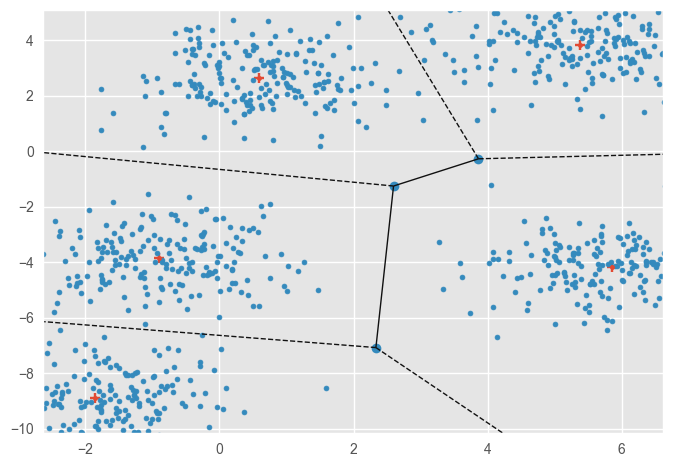

In [38]:
plt.scatter(centers[:,0],centers[:,1],marker='+')
plt.scatter(x1,x2,marker='.')
vor = Voronoi(centers)
fig = voronoi_plot_2d(vor,plt.gca())
plt.show()

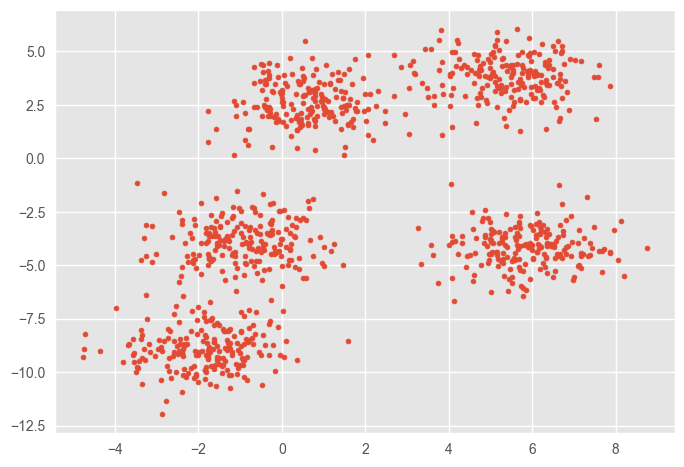

In [39]:
plt.scatter(x1,x2,marker='.')

In [40]:
# distnace of each data point from its centroid
kmeans.transform(X_new).round(2)

array([[ 5.68, 11.05,  0.86,  8.5 ,  5.93],
       [ 2.99, 11.93,  2.49,  6.79,  7.04],
       [ 8.42, 11.95,  3.61, 11.39,  7.18],
       [ 8.48, 11.46,  3.59, 11.08,  6.7 ]])

K-Means: Inertia
Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster. A good model is one with low inertia AND a low number of clusters ( K ).

In [41]:
kmeans.inertia_

1925.6350660467745

In [42]:
# predict should always return better score than inertia as per sklearn rules
kmeans.score(X)

-1925.6350660467742

An important improvement to the k-means algorithm, k-means++, was proposed in a 2006 paper by David Arthur and Sergei Vassilvitskii

 The k-means++ initialization algorithm works like this:
1. Take one centroid c , chosen uniformly at random from the dataset.
2. Take a new centroid c , choosing an instance x with probability D(x(i))^2 / ∑mj=1 D(x(j))^2 , where D(x(i)) is the distance between the instance x(i) and the closest centroid that was already chosen. This probability distribution ensures that instances farther away from already chosen centroids are much more likely to be selected as centroids.
3. Repeat the previous step until all k centroids have been chosen.

# **Finding the optimal number of clusters**

The inertia is not a good performance metric when trying to choose k because it keeps getting lower as we increase k

In [43]:
k = [1,2,3,4,5,6,7,8,9,10]
inertia = []
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit_predict(X)
    inertia.append(kmeans.inertia_)

In [44]:
inertia

[34522.52525694287,
 14586.207119779032,
 6983.874603628351,
 4338.634725309936,
 1925.6350660467747,
 1784.1196358256177,
 1643.5808870108483,
 1498.5051335732624,
 1374.1017614203797,
 1246.74239344229]

Text(0, 0.5, 'inertia')

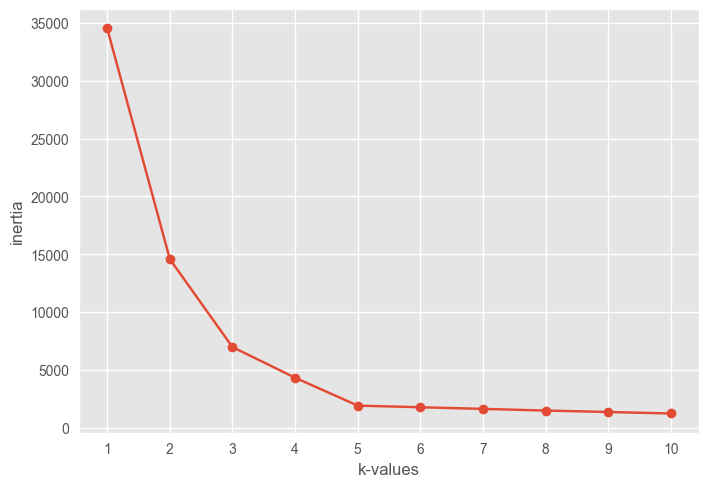

In [45]:
plt.plot(inertia,marker='o')
plt.xlabel('k-values')
plt.xticks(np.arange(len(inertia)),np.arange(1,len(inertia)+1))
plt.ylabel('inertia')

### silhouette score
An instance’s silhouette coefficient is equal to (b – a) / max(a, b), where a is the mean distance to the other instances in the same cluster (i.e., the mean intra-cluster distance) and b is the mean nearest-cluster distance (i.e., the mean distance to the instances of the next closest cluster, defined as the one that minimizes b, excluding the instance’s own cluster).

The silhouette coefficient can vary between –1 and
+1. A coefficient close to +1 means that the instance is well inside its own
cluster and far from other clusters, while a coefficient close to 0 means that
it is close to a cluster boundary; finally, a coefficient close to –1 means that
the instance may have been assigned to the wrong cluster.

In [46]:
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit_predict(X)
silhouette_score(X, kmeans.labels_)

0.6639397841888107

In [47]:
k = [2,3,4,5,6,7,8,9,10]
ss = []
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit_predict(X)
    ss.append(silhouette_score(X,kmeans.labels_))

Text(0, 0.5, 'silhouette score')

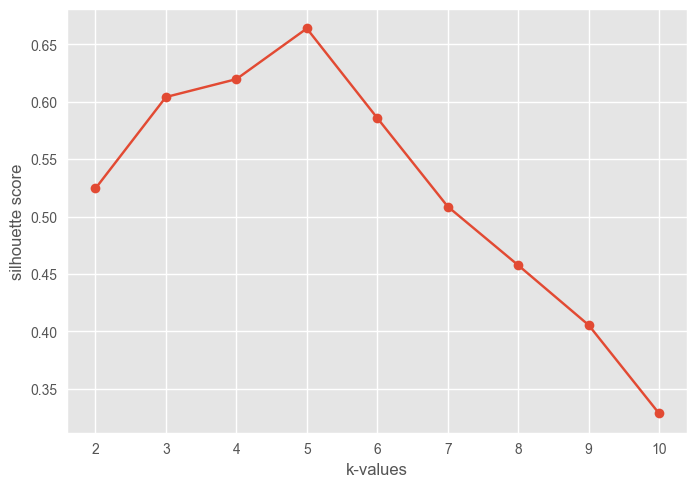

In [48]:
plt.plot(ss,marker='o')
plt.xlabel('k-values')
plt.xticks(np.arange(len(ss)),np.arange(2,len(ss)+2))
plt.ylabel('silhouette score')

#### Silhouette Diagram with yellowbrick
we plot every instance’s silhouette coefficient, sorted by the clusters they are assigned to and by the value of the coefficient.

Each diagram contains one knife shape per cluster. The
shape’s height indicates the number of instances in the cluster, and its width
represents the sorted silhouette coefficients of the instances in the cluster
(wider is better).

The vertical dashed lines represent the mean silhouette score for each
number of clusters. When most of the instances in a cluster have a lower
coefficient than this score (i.e., if many of the instances stop short of the
dashed line, ending to the left of it), then the cluster is rather bad since this
means its instances are much too close to other clusters.

In [49]:
from yellowbrick.cluster import SilhouetteVisualizer

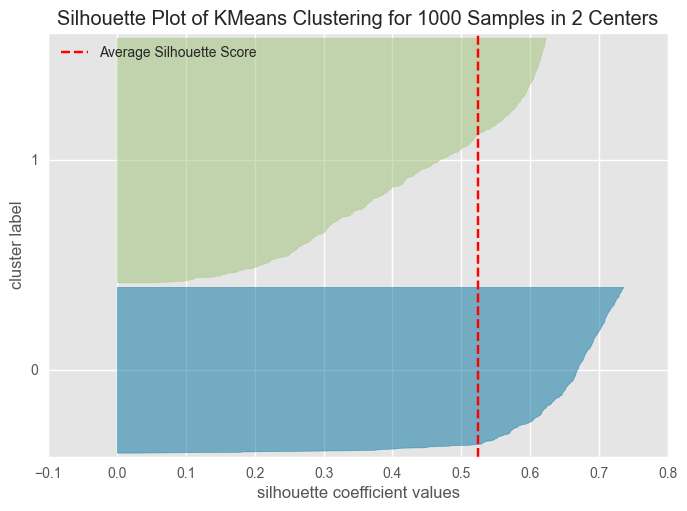

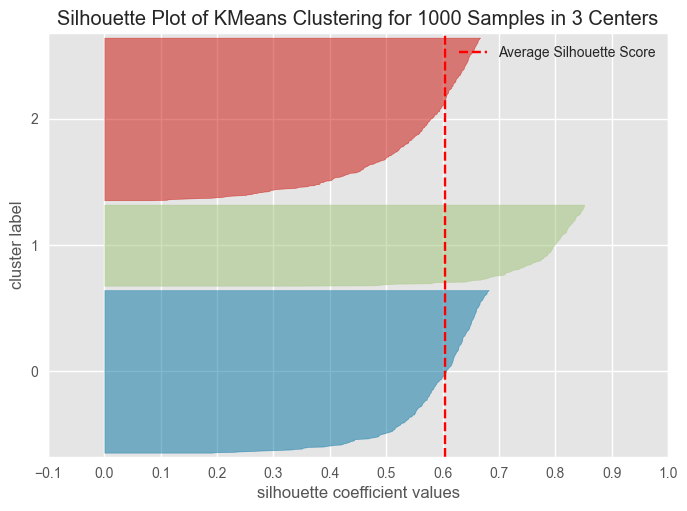

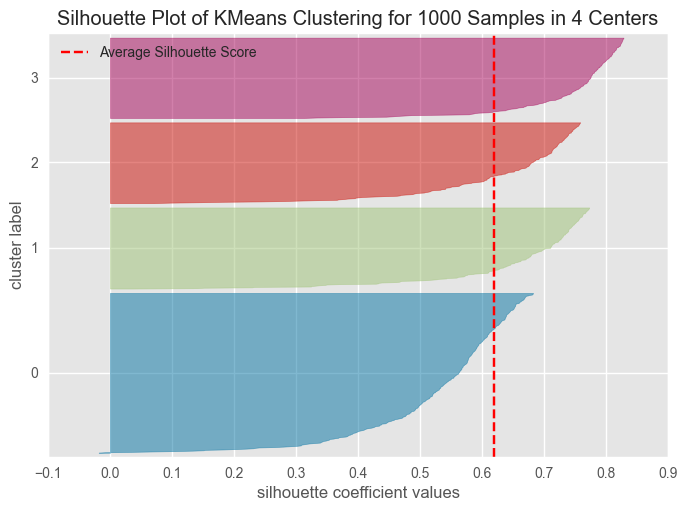

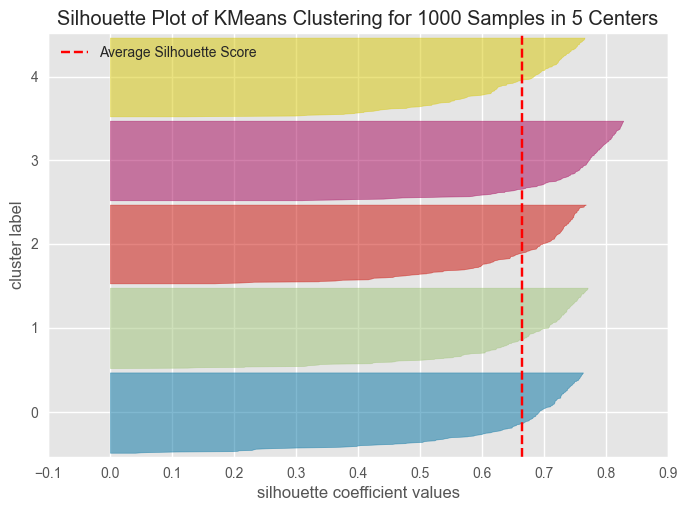

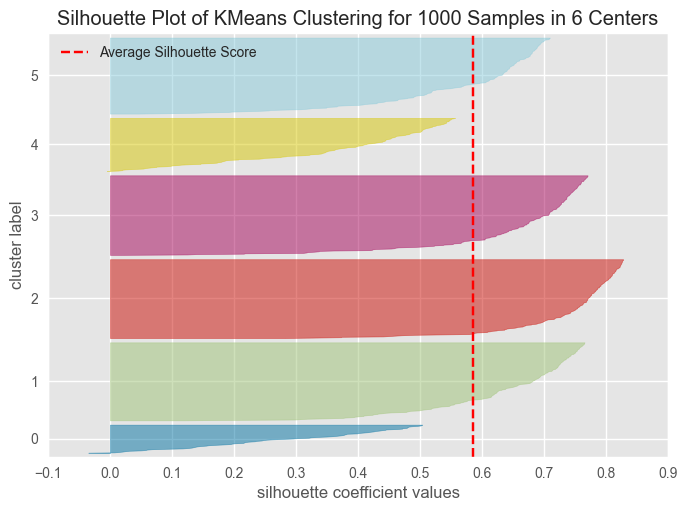

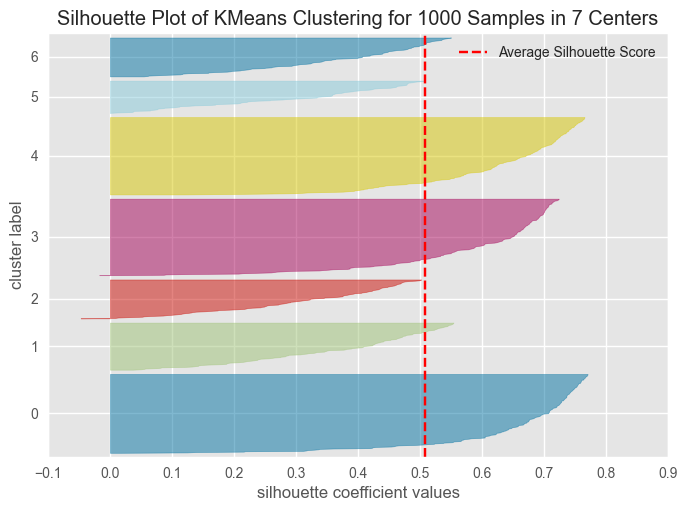

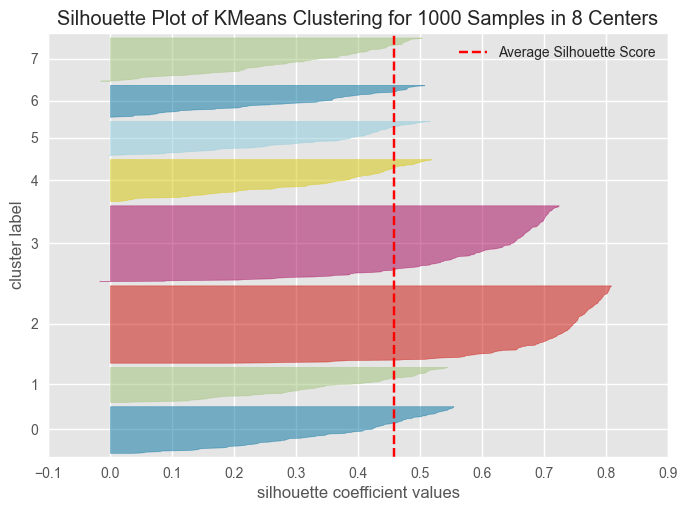

In [50]:
k = [2,3,4,5,6,7,8]
inertia = []
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=42)
    visualizer = SilhouetteVisualizer(kmeans , colors='yellowbrick')
    visualizer.fit(X)
    visualizer.show()